#### ICP6

Chandrika Patibandla - 700777118

Link: 

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6958 - val_loss: 0.6956
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6956 - val_loss: 0.6954
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6954 - val_loss: 0.6952
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6952 - val_loss: 0.6950
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6950 - val_loss: 0.6948


### 1. Add one more hidden layer to autoencoder

In [2]:
# import libraries
from keras.layers import Input, Dense
from keras.models import Model
# import dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# ----------------------------------------------------------
# 1. Adding an additional hidden layer
# ----------------------------------------------------------
hidden_layer_dim = 64
hidden_layer = Dense(hidden_layer_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input, now connected to the hidden layer instead of 'encoded'
decoded = Dense(784, activation='sigmoid')(hidden_layer)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and prepare the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalize the training and test data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# reshape the training and test data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Model training
autoencoder.fit(x_train, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6933 - val_loss: 0.6932


### 2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


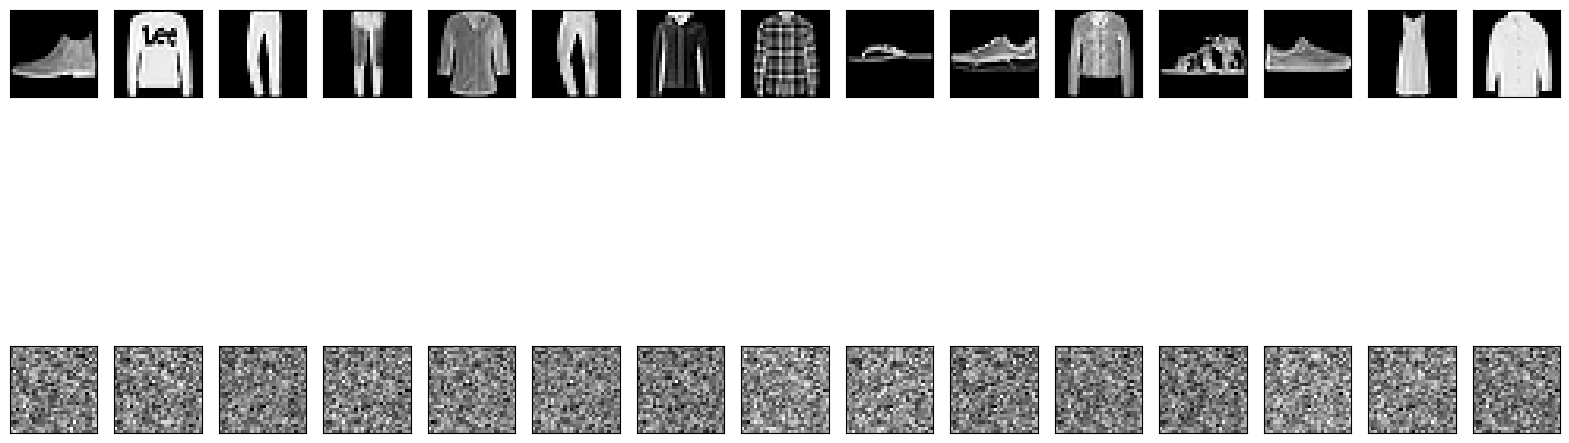

In [ ]:
import matplotlib.pyplot as plt
# Making predictions on test data
decoded_imgs = autoencoder.predict(x_test)

# Displaying the first 15 test images and their reconstructions
number_of_images = 15
# display original
plt.figure(figsize=(20,8))
for i in range(number_of_images):
    # define subplot
    ax = plt.subplot(2, number_of_images, i + 1) # 2 rows, 15 columns
    # display image
    plt.imshow(x_test[i].reshape(28, 28))
    # hide ticks and spines
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number_of_images, i + number_of_images + 1)
    # display image
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    # hide ticks and spines
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 3. Repeat the question 2 on the denoisening autoencoder

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6941 - val_loss: 0.6939
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6933 - val_loss: 0.6930
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6930 - val_loss: 0.6928
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6927 - val_loss: 0.6925
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6922 - val_loss: 0.6920
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6919 - val_loss: 0.6917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


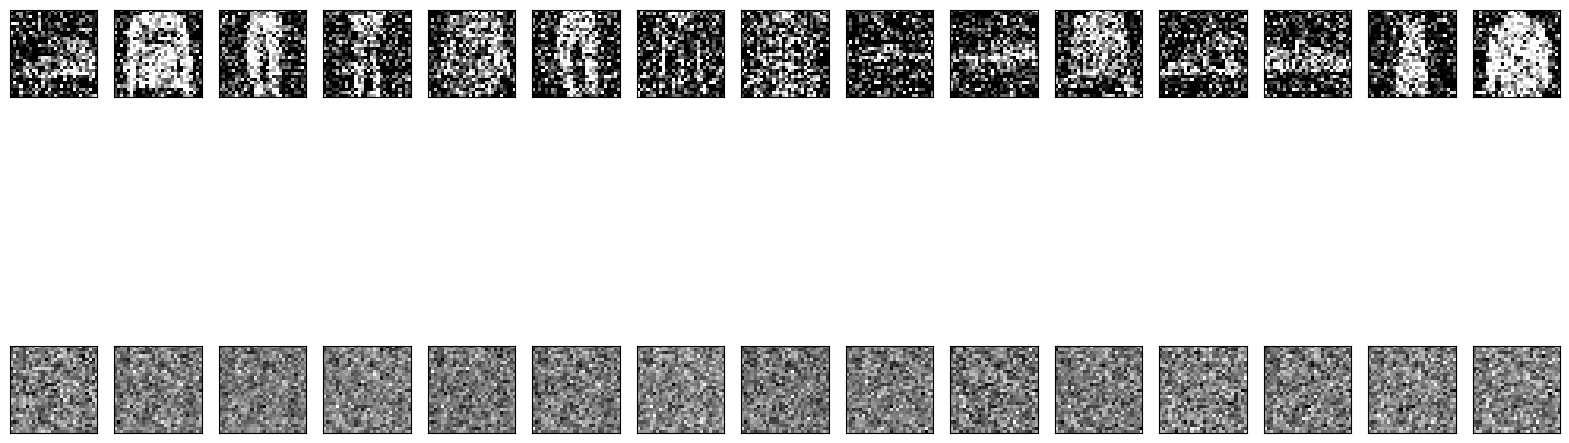

In [8]:
# Model definition
encoding_dim = 32
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# model
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Loading data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# normalizing the training and test data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# reshaping the training and test data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the model
denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Making predictions on test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Displaying the first 15 test images and their reconstructions
number_of_images = 15
# display original
plt.figure(figsize=(20,8))
for i in range(number_of_images):
    # define subplot
    ax = plt.subplot(2, number_of_images, i + 1) # 2 rows, 15 columns
    # display image
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    # hide ticks and spines
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number_of_images, i + number_of_images + 1)
    # display image
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    # hide ticks and spines
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4.Plot loss and accuracy using the history object

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7141 - loss: 0.8755 - val_accuracy: 0.8345 - val_loss: 0.4766
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8505 - loss: 0.4353 - val_accuracy: 0.8480 - val_loss: 0.4373
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8623 - loss: 0.3926 - val_accuracy: 0.8540 - val_loss: 0.4158
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8756 - loss: 0.3562 - val_accuracy: 0.8600 - val_loss: 0.3890
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8785 - loss: 0.3426 - val_accuracy: 0.8659 - val_loss: 0.3828
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8835 - loss: 0.3265 - val_accuracy: 0.8645 - val_loss: 0.3770
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8915 - loss: 0.3066 - val_accuracy: 0.8696 - val_loss: 0.3616
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8929 - loss: 0.2972 - val_accuracy: 0.

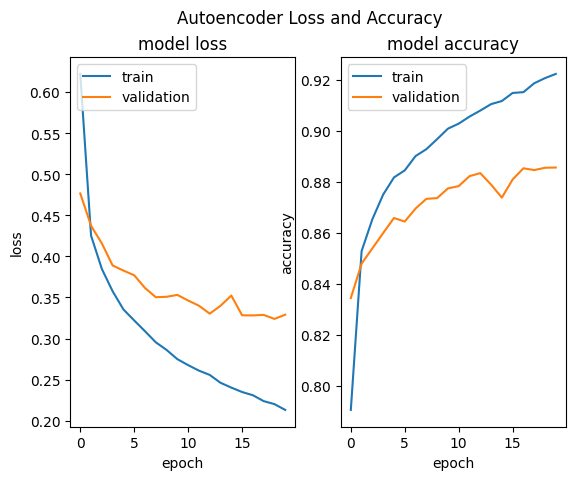

In [15]:
from keras.utils import to_categorical
from keras.optimizers import Adam


# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalize the training and test data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model 
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input with classification
decoded = Dense(10, activation='softmax')(encoded) 

model = Model(input_img, decoded)
# compile the model with a loss function and an optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))



# summarize history for loss and accuracy
fig = plt.figure()
# suptitle
fig.suptitle('Autoencoder Loss and Accuracy')

# two subplots for loss and accuracy
ax = fig.add_subplot(1, 2, 1)
# loss plot
ax.plot(history.history['loss'])
# validation loss plot
ax.plot(history.history['val_loss'])
# title
ax.set_title('model loss')
# labels
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
# legend
ax.legend(['train', 'validation'], loc='upper left')

# accuracy
ax = fig.add_subplot(1, 2, 2)
# accuracy plot
ax.plot(history.history['accuracy'])
# validation accuracy plot
ax.plot(history.history['val_accuracy'])
# title
ax.set_title('model accuracy')
# labels
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
# legend
ax.legend(['train', 'validation'], loc='upper left')

plt.show()
